### Step 4.1: Cluster stations

__Step goals:__ Clustering of metro stations with Gaussian Mixture Model based on their entry traffic over the day.

__Step overview:__
1. Load the data;
2. Prepare features;
3. Perform GMM;
4. Evaluate the performance;
5. Save the result.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from src.models.cluster_models import gmm
plt.style.use('science')

1. Load the data

In [2]:
# We manually corrected station names in original counts data set to create a complete data set of 264 stations
# This is why we're loading the data file from "interim" folder
data_type = 'entry'
gdf = gpd.read_file(f'../data/interim/counts/{data_type}_station.json')
gdf = gdf.rename({'station' : 'station_name'}, axis=1)
print(f'Clustering with be performed on : {gdf.shape[0]} stations')

Clustering with be performed on : 264 stations


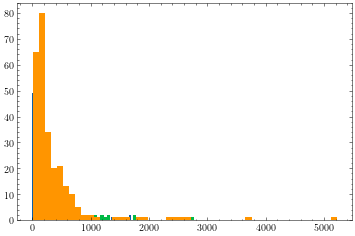

In [42]:
# x = gdf.iloc[:,1:-2].T.loc['0900-0915',:].index
# y = gdf.iloc[:,1:-2].T.loc['0900-0915',:].values
n1, bins1, patches = plt.hist(gdf.iloc[:,1:-2].T.loc['1400-1415',:], bins=50)
n2, bins2, patches = plt.hist(gdf.iloc[:,1:-2].T.loc['1600-1615',:], bins=50)
n3, bins3, patches = plt.hist(gdf.iloc[:,1:-2].T.loc['0900-0915',:], bins=50)

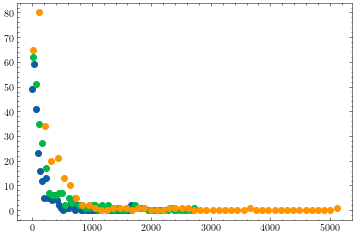

In [44]:
plt.scatter(bins1[:-1], n1)
# plt.xscale('log')
plt.scatter(bins2[:-1], n2)
# plt.xscale('log')
plt.scatter(bins3[:-1], n3)
# plt.xscale('log')

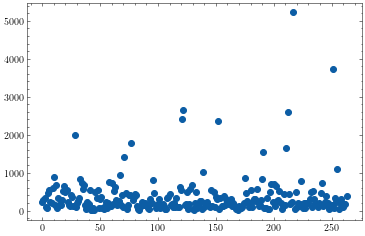

In [25]:
plt.scatter(x, y)

2. Prepare the features

In [3]:
# Select the data (only those time periods when passengers have been entering)
gdf = gdf.sort_values('station_name').reset_index(drop=True)
data = gdf.loc[:,'0500-0515':'0145-0200']

# Scale each time period by the total traffic of this station 
data = data.div(data.sum(axis=1), axis=0)

features = data
print(f'Original number of time intervals : {gdf.shape[1] - 3}')
print(f'Selected number of time intervals : {features.shape[1]}')

Original number of time intervals : 96
Selected number of time intervals : 84


3. Clustering

In [4]:
# Define max number of components
max_components = 20
print(f'Performing GMM for n_components : [2; {max_components}]')

Performing GMM for n_components : [2; 20]


In [5]:
# Gaussian Mixture Model
labels, probs, weights, means, covariances, criterion, metrics = gmm(features=features, 
                                                                     max_components=max_components, 
                                                                     print_covergence=False,
                                                                     save_models=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:58<00:00,  3.11s/it]


4. Evaluate the performance

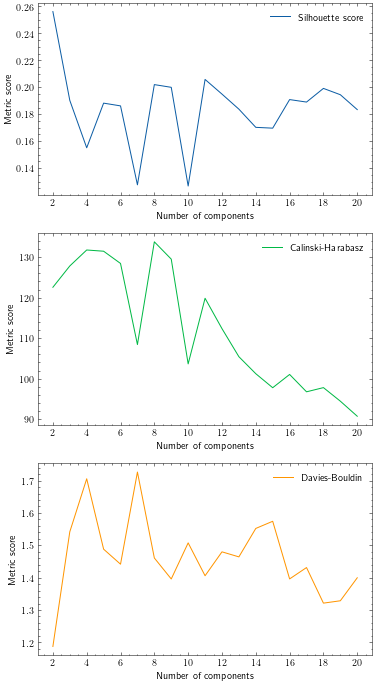

In [19]:
ax = metrics.plot(subplots=True, layout=(3, 1), figsize=(6, 12), rot=0, xticks=np.arange(2, 22, 2), sharex=False);
for i in range(0, 3):
    ax[i, 0].set_xlabel('Number of components')
    ax[i, 0].set_ylabel('Metric score')
plt.savefig('../figures/entry_station_cluster_metrics.eps')

5. Save the result

In [20]:
# Save obtained results
np.save(f"../data/interim/gmm/stations/labels_{data_type}.npy", labels)
np.save(f"../data/interim/gmm/stations/weights_{data_type}.npy", weights)
np.save(f"../data/interim/gmm/stations/probs_{data_type}.npy", probs)
np.save(f"../data/interim/gmm/stations/means_{data_type}.npy", means)
np.save(f"../data/interim/gmm/stations/covariances_{data_type}.npy", covariances)